1. Mean Price: 1560.663453815261
Varience in Price: 58732.365352539186

2. Mean Price on Wednesdays: 1550.706
   Compariing mean: Lower or Equal

3. Mean Price in April: 1698.9526315789474
   Comparing mean: Higher

4. Probability of loss: 0.498

5. Probability of profit on Wednesday: 0.42
6. Conditional probability of profit given it's Wednesday: 0.42


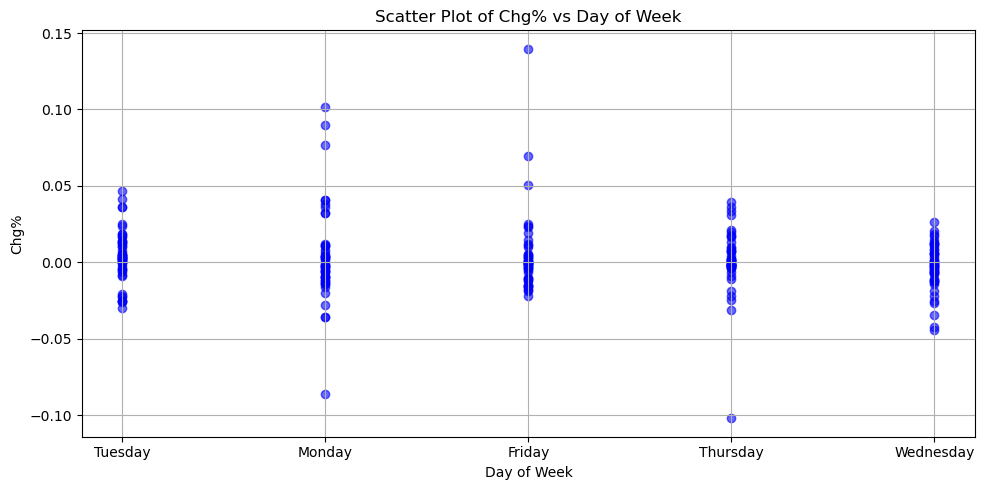

In [4]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

# first of all ...we need to load the data
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

# removindg spaces from the column names 
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# we need only price data and the colom named chg from the excel sheet
price_data = df['Price']
chg_percent = df['Chg%']
df['Weekday'] = df['Date'].dt.day_name()

# mean,variance of Price
mean_price = statistics.mean(price_data)
var_price = statistics.variance(price_data)
print("1. Mean Price:", mean_price)
print("Varience in Price:", var_price)

# Mean only on Wednesdays based on 2 subpart question
wedprices = df[df['Weekday'] == 'Wednesday']['Price']
meanwed = statistics.mean(wedprices)
print("\n2. Mean Price on Wednesdays:", meanwed)
print("   Compariing mean:", "Higher" if meanwed > mean_price else "Lower or Equal")

#  Mean only on April based on 3rd subpart question
aprprices = df[df['Date'].dt.month == 4]['Price']
meanapr = statistics.mean(aprprices)
print("\n3. Mean Price in April:", meanapr)
print("   Comparing mean:", "Higher" if meanapr > mean_price else "Lower or Equal")

# 4. Probability of making a loss 
loss_days = chg_percent.apply(lambda x: x < 0).sum()
total_days = len(chg_percent)
loss_prob = loss_days / total_days
print("\n4. Probability of loss:", round(loss_prob, 4))

# 5. Probability of profit on Wednesday 
wed_data = df[df['Weekday'] == 'Wednesday']
profit_on_wed = wed_data['Chg%'].apply(lambda x: x > 0).sum()
prob_profit_wed = profit_on_wed / len(wed_data)
print("\n5. Probability of profit on Wednesday:", round(prob_profit_wed, 4))


print("6. Conditional probability of profit given it's Wednesday:", round(prob_profit_wed, 4))

#plotting
plt.figure(figsize=(10, 5))
plt.scatter(df['Weekday'], df['Chg%'], alpha=0.6, color='blue')
plt.title("Scatter Plot of Chg% vs Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Chg%")
plt.grid(True)
plt.tight_layout()
plt.show()
